In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
data=pd.read_csv('/content/diabetes.csv')

In [148]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [149]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [150]:
x=data.drop(columns='Outcome',axis=1)
y=data['Outcome']

In [151]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [152]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


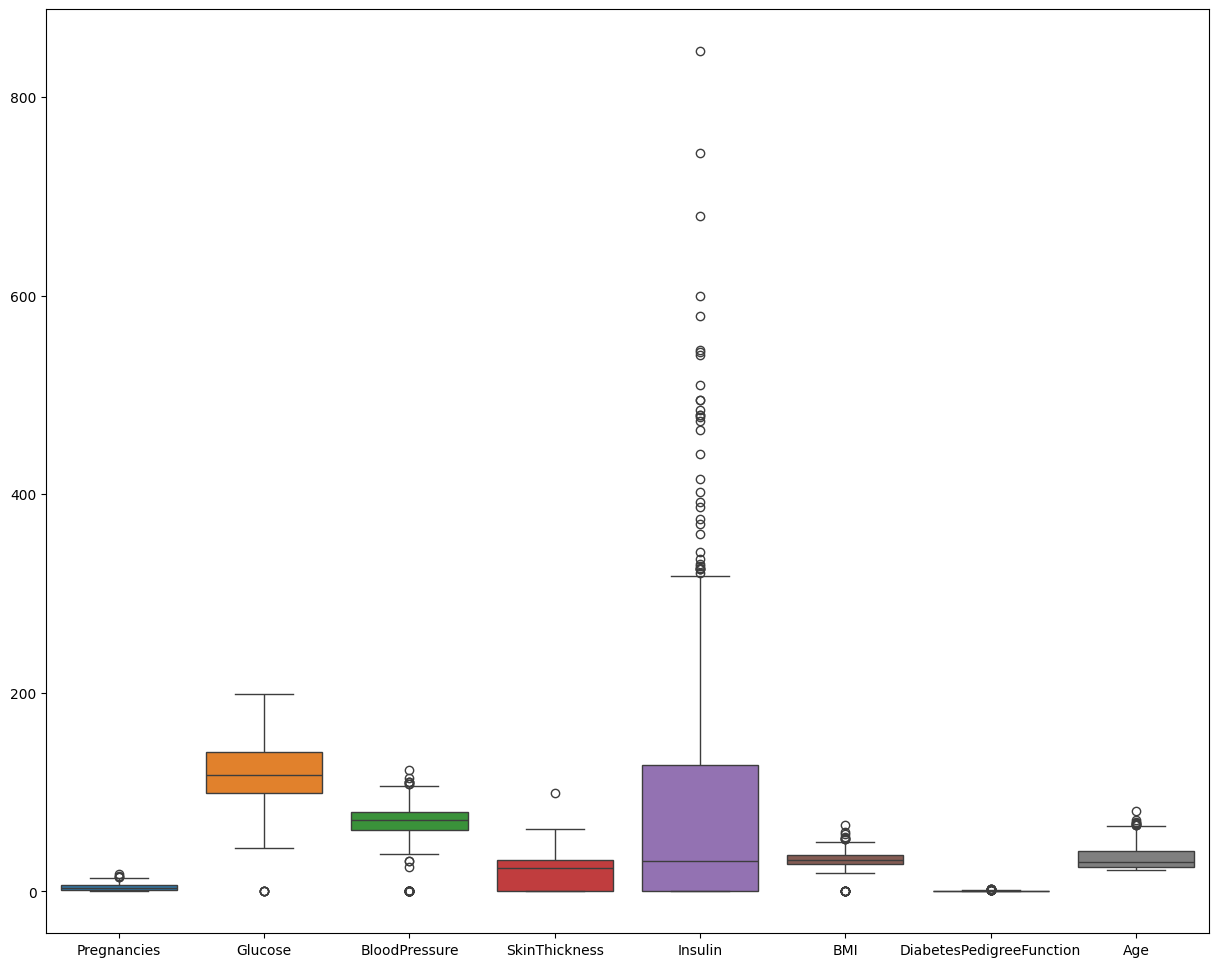

In [153]:
fig,ax=plt.subplots(figsize=(15,12))
sns.boxplot(data=x,ax=ax)
plt.savefig('Boxplot.jpg')
plt.show()

In [154]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
mask = pd.Series(True, index=x.index)
for col in cols:
  q1=data[col].quantile(0.25)
  q2=data[col].quantile(0.75)
  iqr=q2-q1
  upper_limit=q2+1.5*iqr
  lower_limit=q1-1.5*iqr
  mask &= (x[col] >= lower_limit) & (x[col] <= upper_limit)

In [155]:
x_out_det=x[mask]

In [156]:
y_out_det=y[mask]

In [157]:
x_out_det.shape

(639, 8)

In [158]:
y_out_det.shape

(639,)

In [159]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scar=scaler.fit_transform(x_out_det)

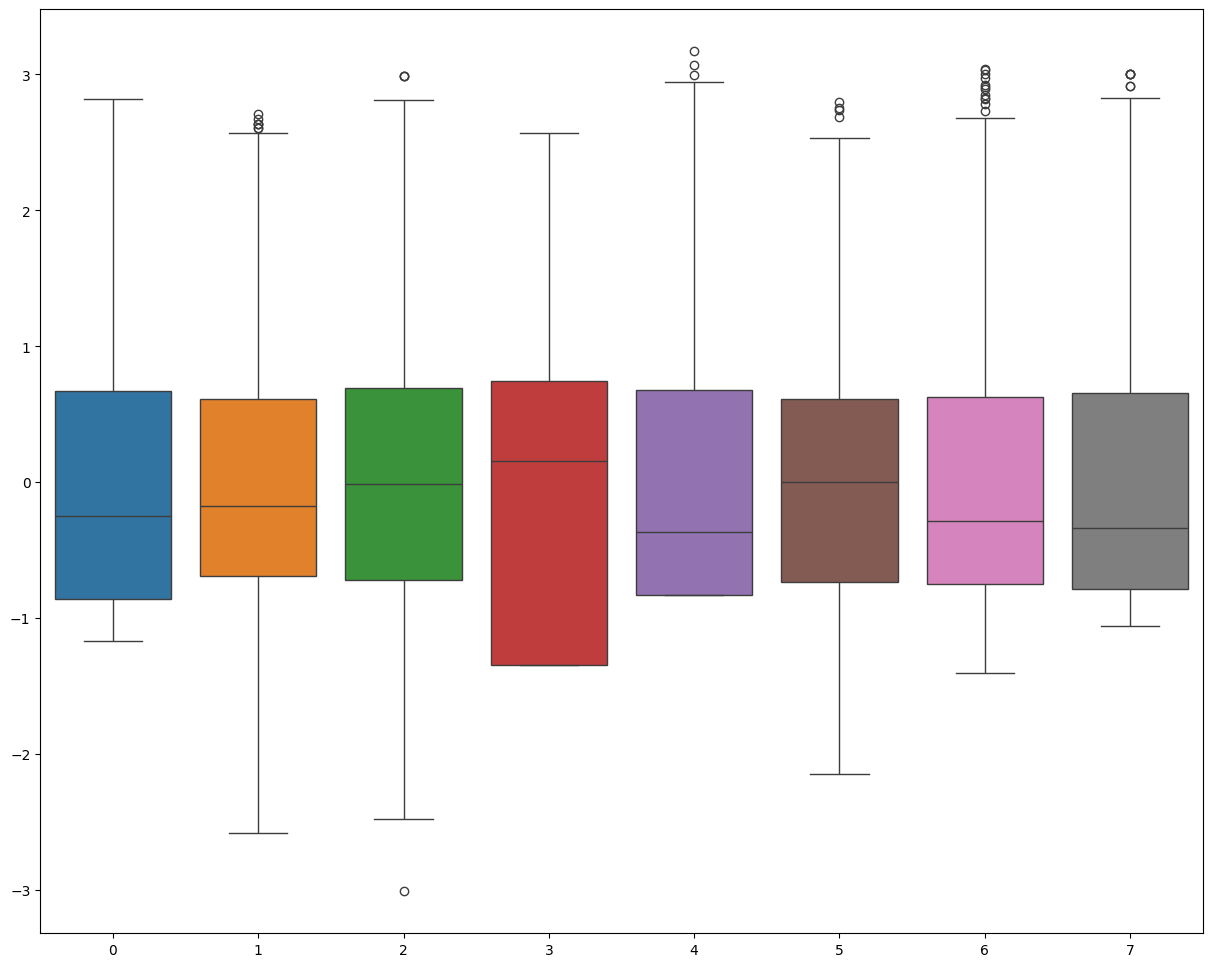

In [160]:
fig,ax=plt.subplots(figsize=(15,12))
sns.boxplot(data=x_scar,ax=ax)
plt.savefig('BoxplotScar.jpg')
plt.show()

In [161]:
x_scar=pd.DataFrame(x_scar)
x_scar.describe()

,0,1,2,3,4,5,6,7
count,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02
mean,5.559802e-17,-1.167558e-16,-4.114254e-16,7.227743e-17,-3.335881e-17,-1.528946e-16,-1.542845e-16,1.667941e-16
std,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00
min,-1.167546e+00,-2.577706e+00,-3.008915e+00,-1.341558e+00,-8.292475e-01,-2.147446e+00,-1.400446e+00,-1.058093e+00
25%,-8.606511e-01,-6.902240e-01,-7.161060e-01,-1.341558e+00,-8.292475e-01,-7.319706e-01,-7.464363e-01,-7.871386e-01
50%,-2.468609e-01,-1.754561e-01,-1.062636e-02,1.589654e-01,-3.638808e-01,-9.006622e-04,-2.838437e-01,-3.355480e-01
75%,6.738245e-01,6.138547e-01,6.948533e-01,7.461268e-01,6.800499e-01,6.135092e-01,6.253899e-01,6.579512e-01
max,2.822090e+00,2.707244e+00,2.987662e+00,2.572851e+00,3.170390e+00,2.798942e+00,3.038049e+00,3.006222e+00


In [162]:
y.value_counts()

,count
Outcome,
0,500
1,268


In [163]:
y_out_det.value_counts()

,count
Outcome,
0,439
1,200


In [164]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [165]:
x_scar.shape

(639, 8)

In [166]:
x_scar.head()

,0,1,2,3,4,5,6,7
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093
4,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230


In [167]:
x_scar.dtypes

,0
0,float64
1,float64
2,float64
3,float64
4,float64
5,float64
6,float64
7,float64


In [168]:
x_scar.shape

(639, 8)

In [169]:
x_scar.head()

,0,1,2,3,4,5,6,7
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093
4,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230


In [170]:
x_scar.describe()

,0,1,2,3,4,5,6,7
count,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02
mean,5.559802e-17,-1.167558e-16,-4.114254e-16,7.227743e-17,-3.335881e-17,-1.528946e-16,-1.542845e-16,1.667941e-16
std,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00
min,-1.167546e+00,-2.577706e+00,-3.008915e+00,-1.341558e+00,-8.292475e-01,-2.147446e+00,-1.400446e+00,-1.058093e+00
25%,-8.606511e-01,-6.902240e-01,-7.161060e-01,-1.341558e+00,-8.292475e-01,-7.319706e-01,-7.464363e-01,-7.871386e-01
50%,-2.468609e-01,-1.754561e-01,-1.062636e-02,1.589654e-01,-3.638808e-01,-9.006622e-04,-2.838437e-01,-3.355480e-01
75%,6.738245e-01,6.138547e-01,6.948533e-01,7.461268e-01,6.800499e-01,6.135092e-01,6.253899e-01,6.579512e-01
max,2.822090e+00,2.707244e+00,2.987662e+00,2.572851e+00,3.170390e+00,2.798942e+00,3.038049e+00,3.006222e+00


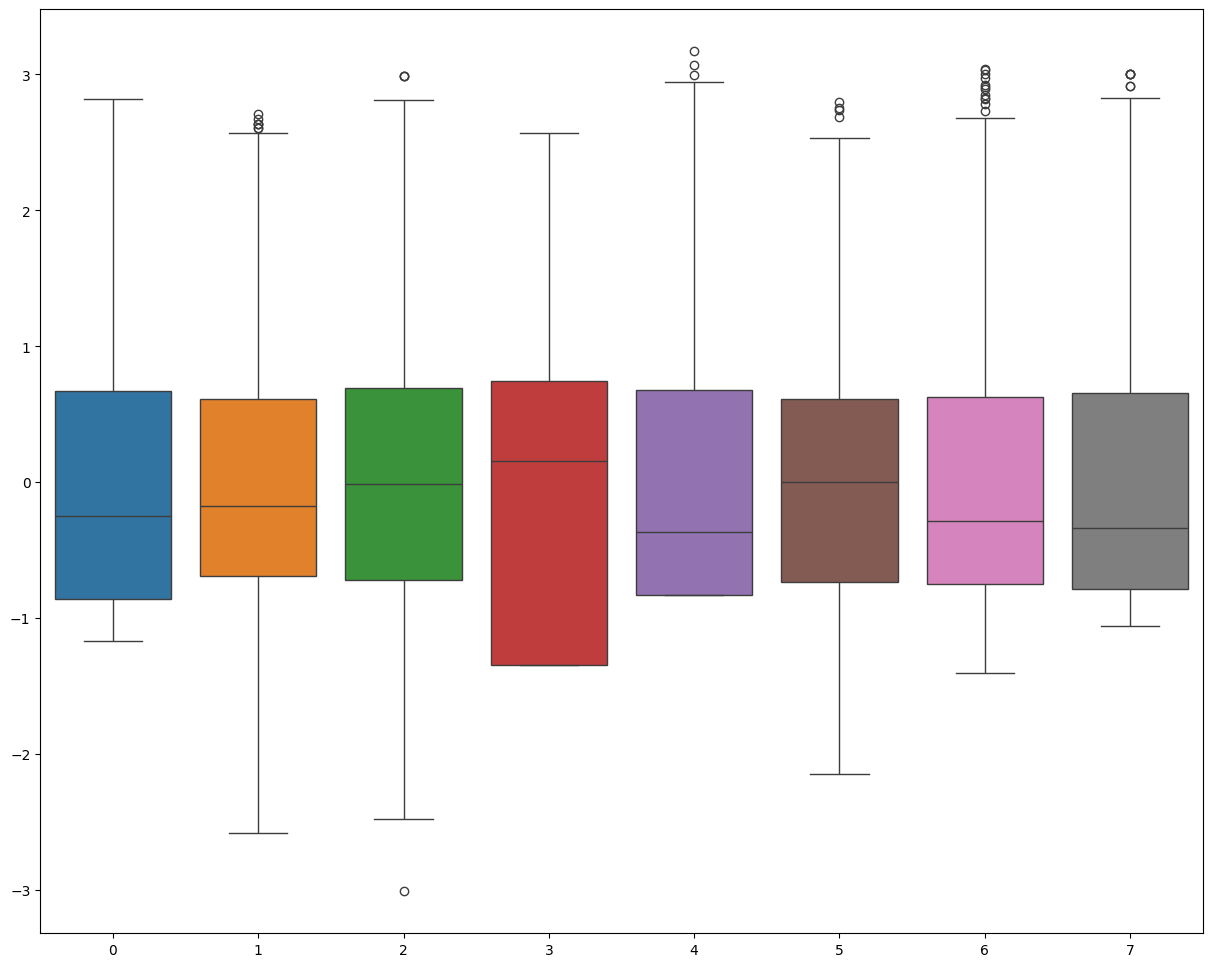

In [171]:
fig,ax=plt.subplots(figsize=(15,12))
sns.boxplot(data=x_scar,ax=ax)
plt.show()

In [172]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [173]:
x_scar.columns

RangeIndex(start=0, stop=8, step=1)

In [174]:
x_scale = pd.DataFrame(x_scar)
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']
x_scale.columns = cols

In [175]:
x_scale.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [176]:
x_scale.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02
mean,5.559802e-17,-1.167558e-16,-4.114254e-16,7.227743e-17,-3.335881e-17,-1.528946e-16,-1.542845e-16,1.667941e-16
std,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00
min,-1.167546e+00,-2.577706e+00,-3.008915e+00,-1.341558e+00,-8.292475e-01,-2.147446e+00,-1.400446e+00,-1.058093e+00
25%,-8.606511e-01,-6.902240e-01,-7.161060e-01,-1.341558e+00,-8.292475e-01,-7.319706e-01,-7.464363e-01,-7.871386e-01
50%,-2.468609e-01,-1.754561e-01,-1.062636e-02,1.589654e-01,-3.638808e-01,-9.006622e-04,-2.838437e-01,-3.355480e-01
75%,6.738245e-01,6.138547e-01,6.948533e-01,7.461268e-01,6.800499e-01,6.135092e-01,6.253899e-01,6.579512e-01
max,2.822090e+00,2.707244e+00,2.987662e+00,2.572851e+00,3.170390e+00,2.798942e+00,3.038049e+00,3.006222e+00


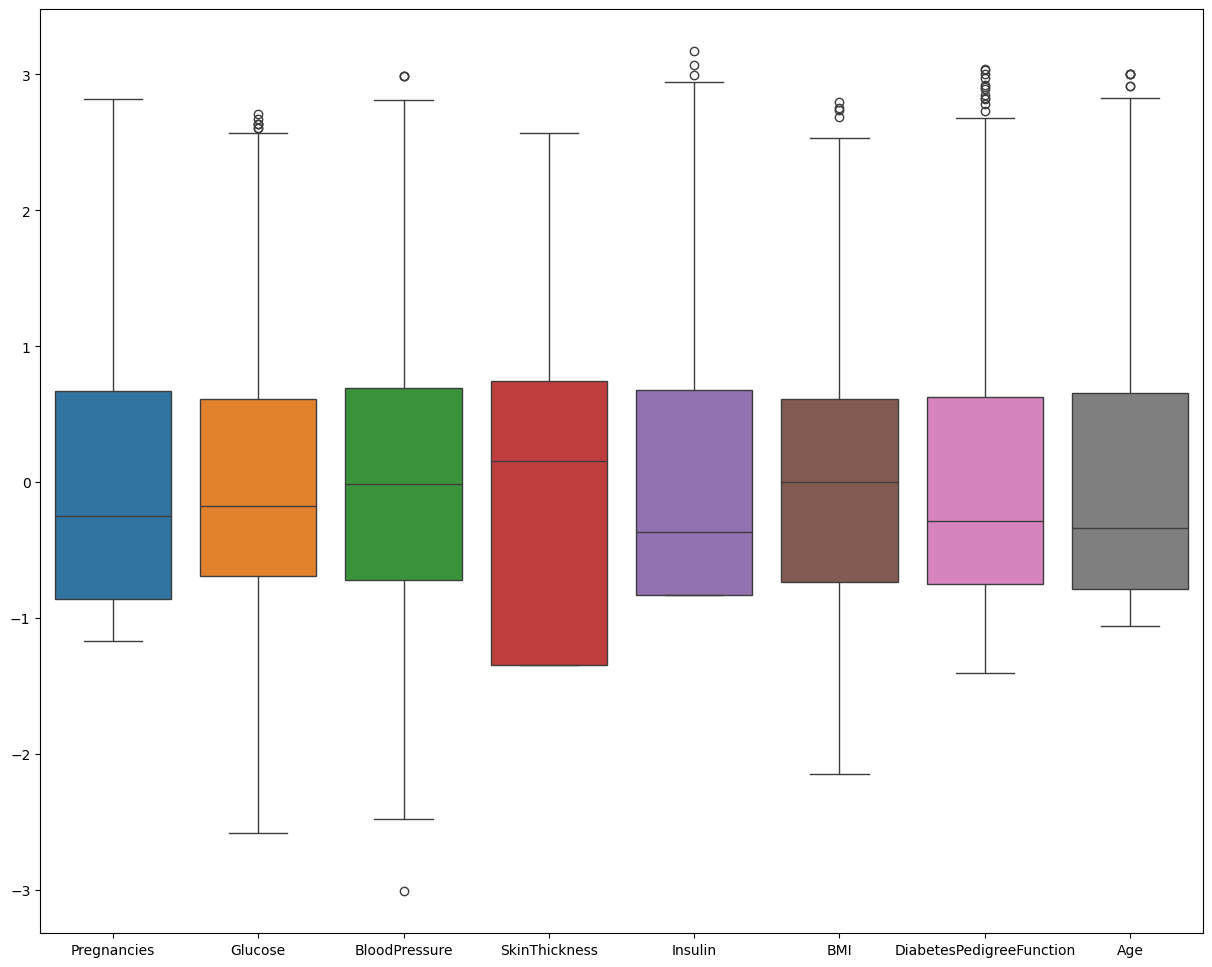

In [177]:
fig,ax=plt.subplots(figsize=(15,12))
sns.boxplot(data=x_scale,ax=ax)
plt.show()

In [178]:
x_scale.shape

(639, 8)

In [179]:
data.shape

(768, 9)

In [180]:
y_out_det.shape

(639,)

In [181]:
insdata=x_scale['Insulin'].quantile(0.95)
newdata=x_scale[x_scale['Insulin']<insdata]

In [182]:
newdata.shape

(607, 8)

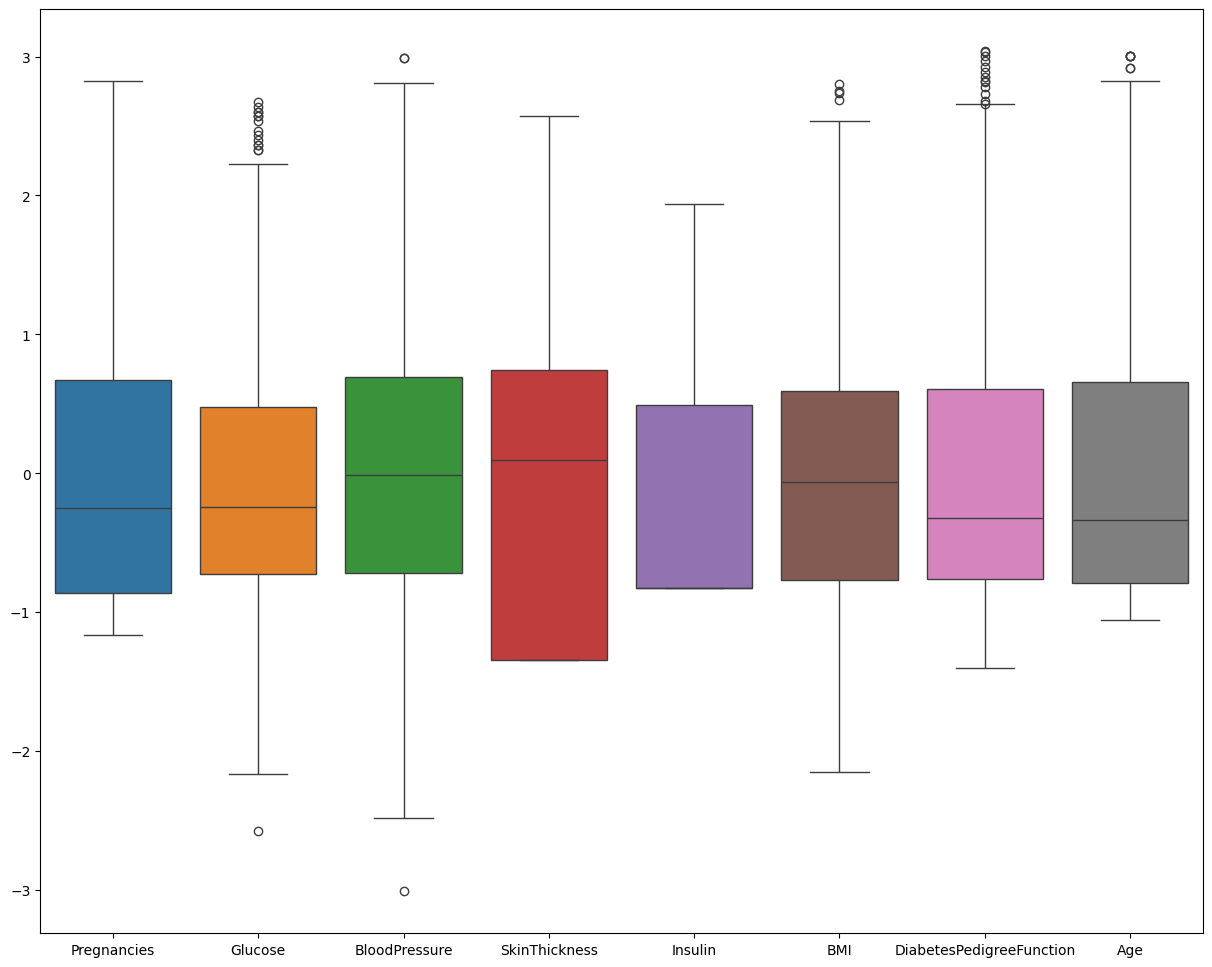

In [183]:
fig,ax=plt.subplots(figsize=(15,12))
sns.boxplot(data=newdata,ax=ax)
plt.show()

In [184]:
x_scale.reset_index(drop=True,inplace=True)
y_out_det.reset_index(drop=True,inplace=True)

In [185]:
x_scale.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02
mean,5.559802e-17,-1.167558e-16,-4.114254e-16,7.227743e-17,-3.335881e-17,-1.528946e-16,-1.542845e-16,1.667941e-16
std,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00,1.000783e+00
min,-1.167546e+00,-2.577706e+00,-3.008915e+00,-1.341558e+00,-8.292475e-01,-2.147446e+00,-1.400446e+00,-1.058093e+00
25%,-8.606511e-01,-6.902240e-01,-7.161060e-01,-1.341558e+00,-8.292475e-01,-7.319706e-01,-7.464363e-01,-7.871386e-01
50%,-2.468609e-01,-1.754561e-01,-1.062636e-02,1.589654e-01,-3.638808e-01,-9.006622e-04,-2.838437e-01,-3.355480e-01
75%,6.738245e-01,6.138547e-01,6.948533e-01,7.461268e-01,6.800499e-01,6.135092e-01,6.253899e-01,6.579512e-01
max,2.822090e+00,2.707244e+00,2.987662e+00,2.572851e+00,3.170390e+00,2.798942e+00,3.038049e+00,3.006222e+00


In [186]:
res=x_scale['Insulin'].quantile(0.95)
mask=x_scale['Insulin']<res
datanewx=x_scale[mask]

In [187]:
y_out_det.shape

(639,)

In [188]:
datanewx.shape

(607, 8)

In [189]:
y_out_det.value_counts()

,count
Outcome,
0,439
1,200


<Axes: ylabel='Outcome'>

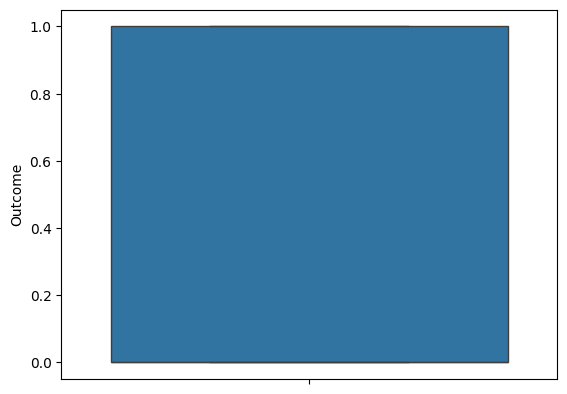

In [190]:
sns.boxplot(data=y_out_det)

In [191]:
datanewx.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,-0.003670,-0.055655,-0.012224,-0.038797,-0.131394,-0.033624,-0.020139,-0.006564
std,0.995769,0.971338,1.000286,0.999250,0.838538,0.992092,0.988635,0.998873
min,-1.167546,-2.577706,-3.008915,-1.341558,-0.829247,-2.147446,-1.400446,-1.058093
25%,-0.860651,-0.724542,-0.716106,-1.341558,-0.829247,-0.770857,-0.762388,-0.787139
50%,-0.246861,-0.244092,-0.010626,0.093725,-0.829247,-0.063119,-0.319735,-0.335548
75%,0.673824,0.476583,0.694853,0.746127,0.491388,0.590177,0.605451,0.657951
max,2.822090,2.672926,2.987662,2.572851,1.937798,2.798942,3.038049,3.006222


In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y_out_det,test_size=0.33,random_state=42)

In [193]:
x_train.shape

(428, 8)

In [194]:
x_test.shape

(211, 8)

In [195]:
y_train.value_counts()

,count
Outcome,
0,296
1,132


In [196]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train_res,y_train_res=smote.fit_resample(x_train,y_train)

In [197]:
pd.Series(y_train_res).value_counts()

,count
Outcome,
0,296
1,296


In [198]:
from sklearn.linear_model import LogisticRegression
classi=LogisticRegression()
classi.fit(x_train_res,y_train_res)

LogisticRegression()

In [199]:
y_pred=classi.predict(x_test)
print(y_pred)

[0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1
 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0]


In [200]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7630331753554502

In [201]:
from sklearn.metrics import classification_report
target_names=['Non-Diabetic','Diabetic']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.83      0.82      0.82       143
    Diabetic       0.63      0.65      0.64        68

    accuracy                           0.76       211
   macro avg       0.73      0.73      0.73       211
weighted avg       0.76      0.76      0.76       211



In [205]:
import pickle
pickle.dump(classi,open('Classification_model.pkl','wb'))

In [206]:
classification_model=pickle.load(open('Classification_model.pkl','rb'))

In [207]:
classification_model.predict(x_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])